In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import tree
import sklearn.linear_model as LM
from sklearn import ensemble
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.metrics import zero_one_loss,r2_score,mean_squared_error

In [2]:
X,Y=make_classification(n_samples=12000,n_features=10,n_redundant=0,n_informative=2,random_state=123,n_clusters_per_class=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123)
dt_stump = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, Y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, Y_test)
dt = tree.DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(X_train, Y_train)
dt_err = 1.0 - dt.score(X_test, Y_test)

B=400
ada_discrete = ensemble.AdaBoostClassifier(base_estimator=dt_stump,n_estimators=B,algorithm="SAMME")
ada_discrete.fit(X_train, Y_train)
ada_real = ensemble.AdaBoostClassifier(base_estimator=dt_stump,n_estimators=B,algorithm="SAMME.R")
ada_real.fit(X_train, Y_train)

ada_discrete_err = np.zeros((B,))
for i,Y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(Y_pred, Y_test)
ada_real_err = np.zeros((B,))
for i, Y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(Y_pred, Y_test)

说明：利用模拟数据对比单棵决策树、弱模型以及提升策略的预测效果。
1、首先make_classification生成样本量等于12000，10个输入变量，输出变量为二分类的数据集。利用旁置法划分训练集和测试集。
2、建立树深度等于1的弱模型，计算其测试误差。
3、建立树深度等于9的复杂决策树，计算其测试误差。
3、计算不断增加迭代次数至400过程中，计算以上述弱模型为基础学习器的提升策略中的SAMME和SAMME.R算法的测试误差。

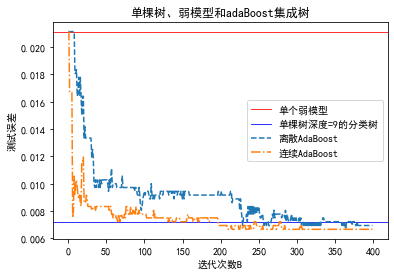

In [3]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.axhline(y=dt_stump_err,c='red',linewidth=0.8,label='单个弱模型')
axes.axhline(y=dt_err,c='blue',linewidth=0.8,label='单棵树深度=9的分类树')
axes.plot(np.arange(B), ada_discrete_err,linestyle='--',label='离散AdaBoost')
axes.plot(np.arange(B), ada_real_err,linestyle='-.',label='连续AdaBoost')
axes.set_xlabel('迭代次数B')
axes.set_ylabel('测试误差')
axes.set_title('单棵树、弱模型和adaBoost集成树')
axes.legend()
#leg = axes.legend(loc='upper right', fancybox=True)
#leg.get_frame().set_alpha(0.7)
plt.show()

说明：对上述计算结果绘制折线图。图形显示弱模型的测试误差最高，复杂决策树的测试误差最低，但随迭代次数的增加，提升策略的测试误差不仅可以降复杂模型的水平，而且还会更低。